# Data Science: Introdução a análise de séries temporais
__Professor:__ Guilherme Lima<br>
__Disponível:__ <a href="https://cursos.alura.com.br/course/data-science-series-temporais" target=blank>ALURA</a><br>
- Aprenda as principais técnicas de análise de Séries temporais
- Entenda na prática quais os principais elementos presentes nas time series
- Saiba como aplicar a função de autocorrelação nos seus dados
- Aplique a média móvel para normalizar seus dados
- Desenvolva seus conhecimentos em Pandas, Seaborn e Matplotilib


## 1. Tendência das vendas

### Análise das vendas

In [1]:
#Importando bibliotecas
!pip install pandas
import pandas as pd

In [2]:
#Importando os dados
alucar = pd.read_csv('data/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
print(f'Quantidade de linhas e colunas é: {alucar.shape}')

Quantidade de linhas e colunas é: (24, 2)


In [4]:
print(f'Quantidade de dados não nulos é: {alucar.isna().sum()}')

Quantidade de dados não nulos é: mes       0
vendas    0
dtype: int64


In [5]:
print(f'Quantidade de dados nulos no dataframe é: {alucar.isna().sum().sum()}')

Quantidade de dados nulos no dataframe é: 0


In [6]:
# Verificando os tipos de dados de cada coluna
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
# Convertendo a coluna de mês para datetime
alucar.mes = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
# Importando bibliotecas para criar gráficos
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

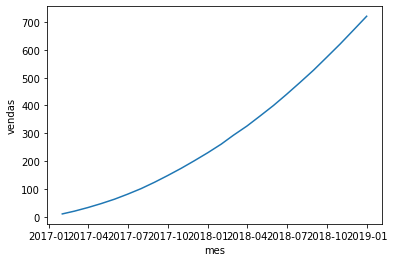

In [9]:
sns.lineplot(x='mes',y='vendas',data=alucar)

### Aperfeiçoando o gráfico

<AxesSubplot:xlabel='mes', ylabel='vendas'>

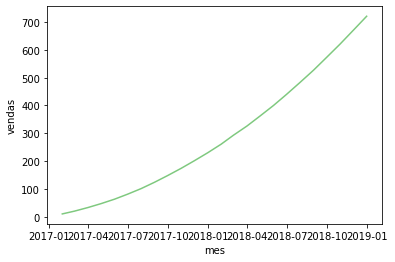

In [10]:
# Selecionar uma palheta de cores para os dados
sns.set_palette('Accent')
sns.lineplot(x='mes',y='vendas',data=alucar)

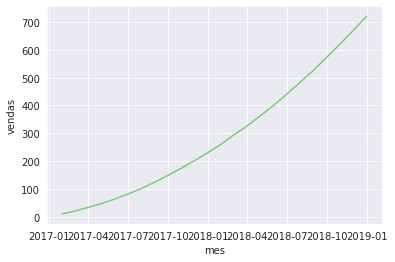

In [11]:
# Alterar o background do grid do gráfico
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='vendas',data=alucar)

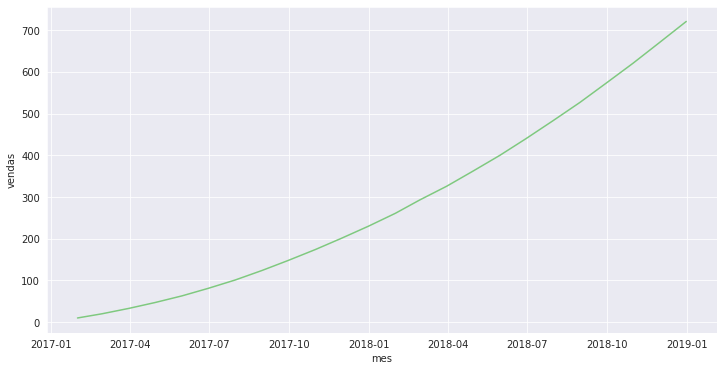

In [12]:
# Alerando o tamanho do gráfico
ax.figure.set_size_inches(12,6)
ax.get_figure()

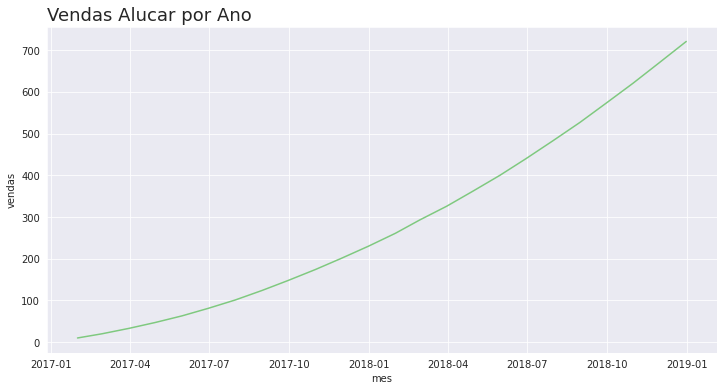

In [13]:
# Adicionado um título para o gráfico
ax.set_title('Vendas Alucar por Ano',loc='left',fontsize=18)
ax.get_figure()

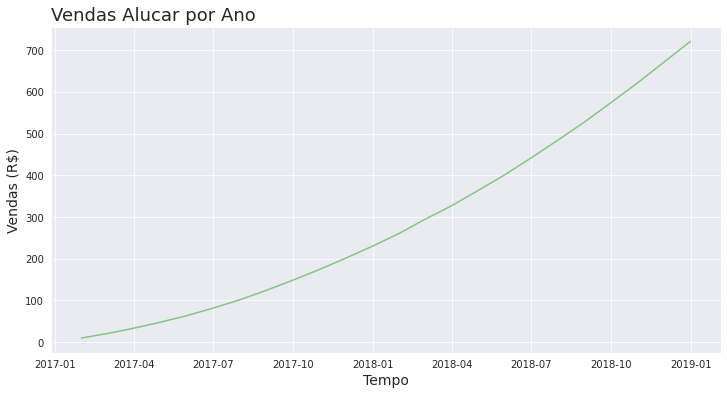

In [14]:
# Melhorando os títulos de labels
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Vendas (R$)',fontsize=14)
ax.get_figure()

### Exercício: Analisando e gerando gráfico
Após importar o arquivo alucar.csv e ler utilizando o pandas, examinamos os dados para descobrir a quantidade de linhas, colunas, dados nulos e alteramos o mes para um tipo datetime e geramos o gráfico das vendas.
<br>
Sabendo disso, selecione as alternativas verdadeiras.
<br>
Selecione 2 alternativas

__a) Para descobrir a quantidade de linhas e colunas, podemos executar o comando shape.__<br>
b) O título e legendas nos eixos não são tão importantes assim em um gráfico, já que a pessoa que desenvolveu sabe do que o gráfico se trata.<br>
__c) Para descobrir a quantidade de dados nulos, podemos executar o comando isna().sum().__

### Para saber mais: Time series

__Time series do nosso dia a dia__<br><br>
Aprendemos que time series é uma coleção de observações ou dados, geralmente feita através de um tempo sequencial, que pode ser segundos, minutos, dias, meses, anos, entre outros.

Tipicamente, esse tempo é espaçados entre cada ponto de dados, que podemos medir o crescimento das vendas, como visto nesta primeira aula.

Há um post no blog da Alura que podemos aprender sobre <a href="https://blog.alura.com.br/crescimento-proporcional-entre-linhas-time-series-utilizando-pandas/" target=blank>Crescimento proporcional entre time series utilizando pandas.</a>

Vale a pena conferir!

## 2. Decomposição e autocorrelação

### Decompondo as vendas

In [15]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [16]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


<AxesSubplot:title={'left':'Aumento das vendas por período'}, xlabel='Tempo', ylabel='Aumento'>

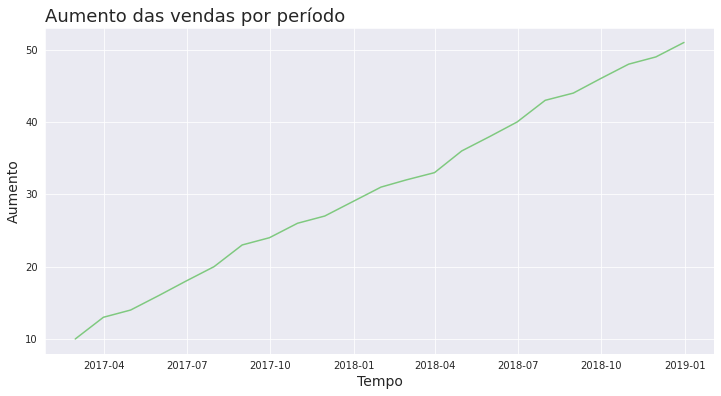

In [17]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax2 = sns.lineplot(x='mes',y='aumento',data=alucar)
ax2.figure.set_size_inches(12,6)
ax2.set_title('Aumento das vendas por período',fontsize=18,loc='left')
ax2.set_xlabel('Tempo',fontsize=14)
ax2.set_ylabel('Aumento',fontsize=14)
ax2

In [18]:
def plotar(titulo,labelx,labely,x,y,dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax2 = sns.lineplot(x=x,y=y,data=dataset)
    ax2.figure.set_size_inches(12,6)
    ax2.set_title(titulo,fontsize=18,loc='left')
    ax2.set_xlabel(labelx,fontsize=14)
    ax2.set_ylabel(labely,fontsize=14)
    ax2

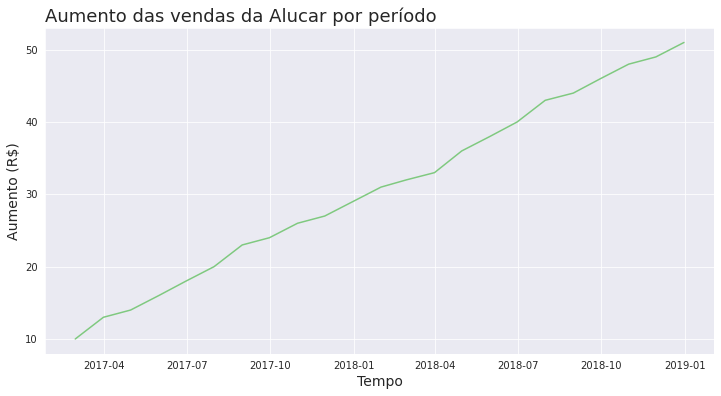

In [19]:
plotar('Aumento das vendas da Alucar por período','Tempo','Aumento (R$)','mes','aumento',alucar)

In [20]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


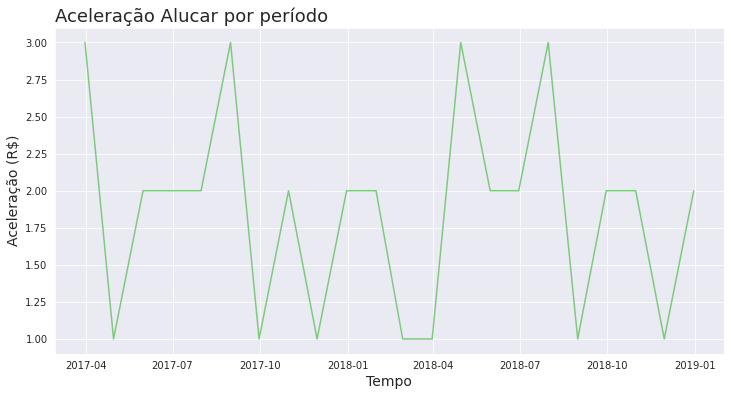

In [21]:
plotar('Aceleração Alucar por período','Tempo','Aceleração (R$)','mes','aceleracao',alucar)

### Observação e tendência

<AxesSubplot:xlabel='mes', ylabel='aceleracao'>

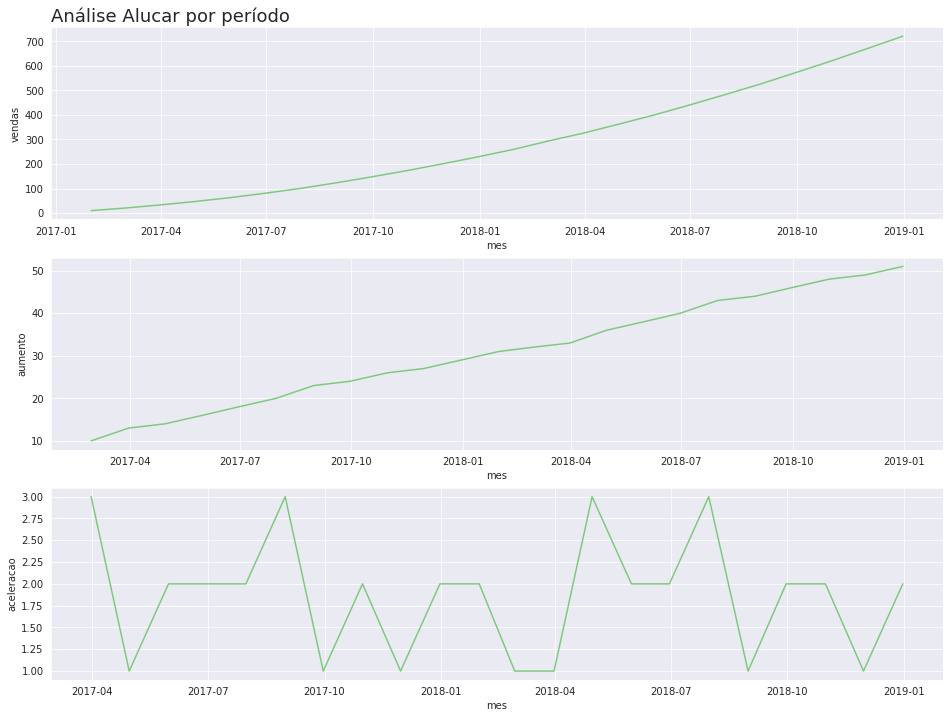

In [22]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise Alucar por período',fontsize=18,loc='left')
sns.lineplot(x='mes',y='vendas',data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes',y='aumento',data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes',y='aceleracao',data=alucar)


In [23]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18,loc='left')
    sns.lineplot(x=x,y=y1,data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2,data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3,data=dataset)

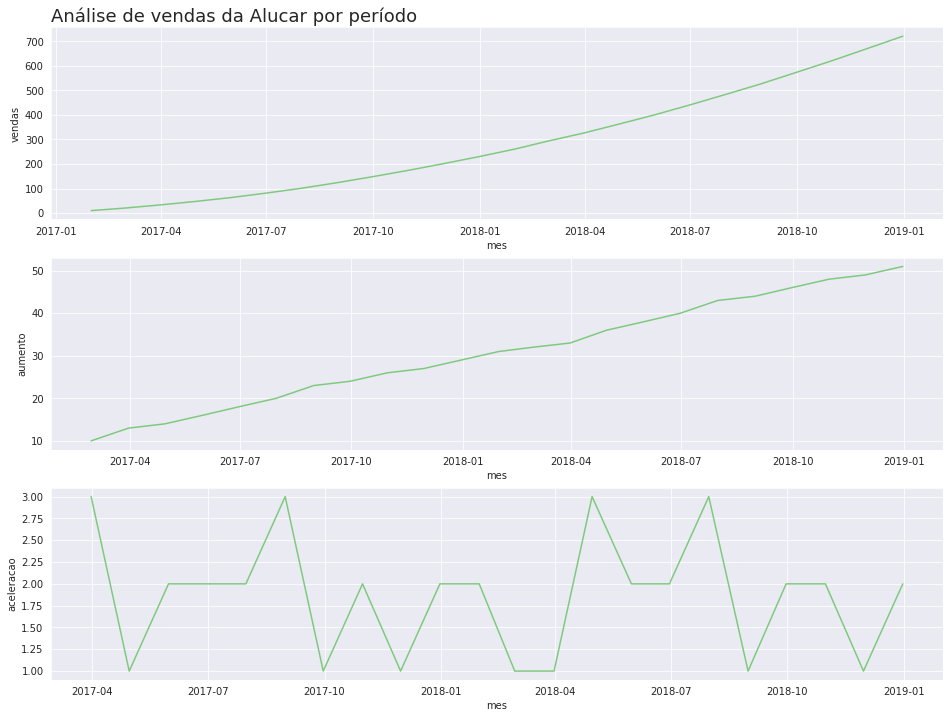

In [24]:
plot_comparacao('mes','vendas','aumento','aceleracao',alucar,'Análise de vendas da Alucar por período')

### Autocorrelação

In [25]:
#Importando as bibliotecas
from pandas.plotting import autocorrelation_plot

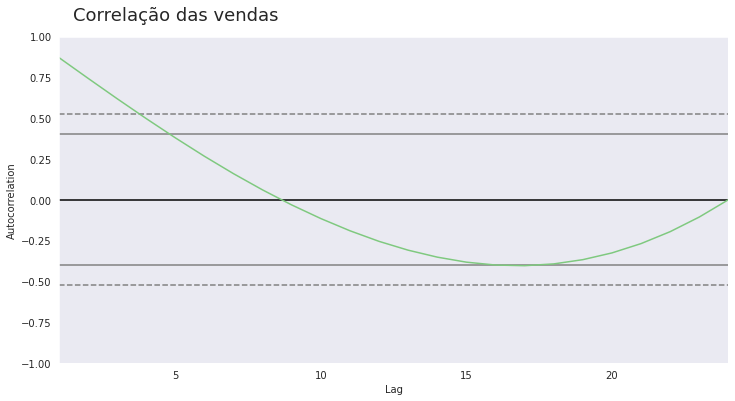

In [26]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(alucar.vendas)
ax = ax

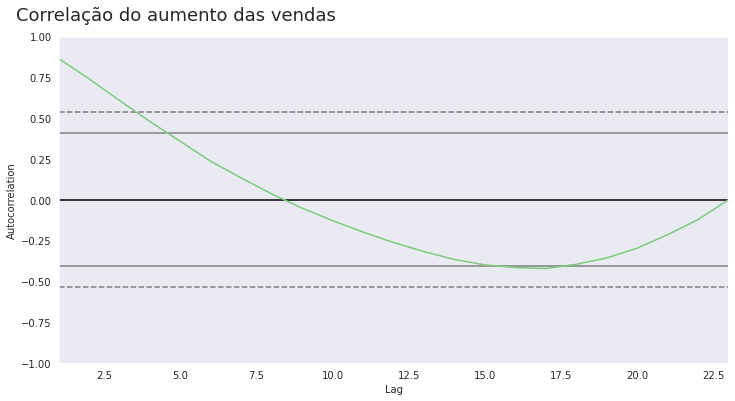

In [27]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(alucar.aumento[1:])
ax = ax

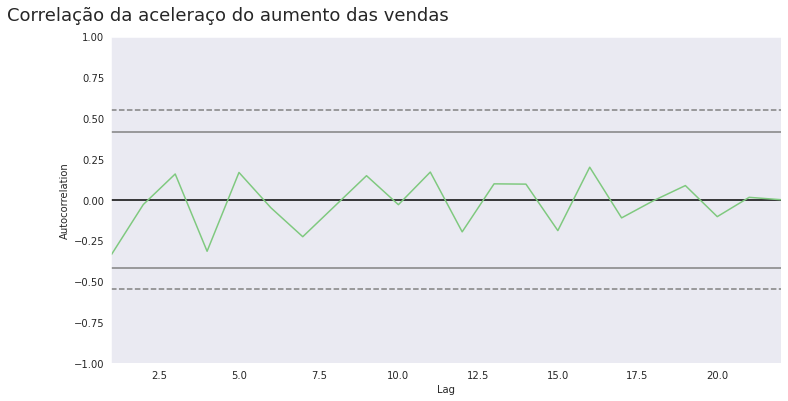

In [28]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleraço do aumento das vendas',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(alucar.aceleracao[2:])
ax = ax

### Exercício: Níveis de autocorrelação

Nesta aula, executamos a função de autocorrelação para descobrir se havia uma correlação entre os valores das vendas da Alucar e geramos o seguinte gráfico:
<br>
Em relação ao gráfico de autocorrelação, podemos afirmar que:
<br>
Selecione 3 alternativas

a) O valor de autocorrelação entre 0,2 e 0,4, indica que também temos uma correlação nula.<br>
__b) O valor de autocorrelação entre 0,7 e 0,9, indica que temos uma correlação forte.__<br>
__c) O valor de autocorrelação 1 ou -1 indica uma correlação perfeita.__<br>
__d) O valor de autocorrelação 0 indica uma correlação nula.__<br>

### Para saber mais: Autocorrelação

A função de autocorrelação é a principal ferramenta de diagnóstico para análise de time series.
<br>
Autocorrelação significa a correlação de valores de uma mesma variável ordenados no tempo.
<br>
Para melhor interpretação do gráfico, podemos analisar a tabela abaixo:
<br><br>
<table>
        <tr>
                <th>Autocorrelação</th>
                <th>Interpretação</th>
        </tr>
        <tr>
                <td>1</td>
                <td>correlação perfeita positiva</td>
        </tr>
        <tr>
                <td>0,7 a 0,9</td>
                <td>correlação forte</td>
        </tr>
        <tr>
                <td>0,4 a 0,7</td>
                <td>correlação moderada</td>
        </tr>
        <tr>
                <td>0,2 a 0,4</td>
                <td>correlação fraca</td>
        </tr>
        <tr>
                <td>0</td>
                <td>correlação nula</td>
        </tr>
        <tr>
                <td>< 0</td>
                <td>correlação negativa</td>
        </tr>
        <tr>
                <td>-1</td>
                <td>correlação perfeita negativa</td>
        </tr>
</table>
<br><br>
<a href="https://pt.wikipedia.org/wiki/Autocorrela%C3%A7%C3%A3o" target=blank>Neste link</a>, você encontra mais informações sobre autocorrelação.

## 3. Importância da decomposição e sazonalidade

### Analisando assinantes

In [29]:
# Importando a base de dados
assinantes = pd.read_csv('data/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [30]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [31]:
assinantes.mes = pd.to_datetime(assinantes.mes)

In [32]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [33]:
print(f'Qantidade de linhas e colunas: {assinantes.shape}')

Qantidade de linhas e colunas: (24, 2)


In [34]:
print(f'Quantidade de dados nulos: \n{assinantes.isna().sum()}')

Quantidade de dados nulos: 
mes           0
assinantes    0
dtype: int64


In [35]:
print(f'Quantidade de dados nulos no dataframe: {assinantes.isna().sum().sum()}')

Quantidade de dados nulos no dataframe: 0


In [36]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes.head()

,mes,assinantes,aumento
0,2017-01-31,0,NaN
1,2017-02-28,10,10.0
2,2017-03-31,21,11.0
3,2017-04-30,34,13.0
4,2017-05-31,49,15.0


In [37]:
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


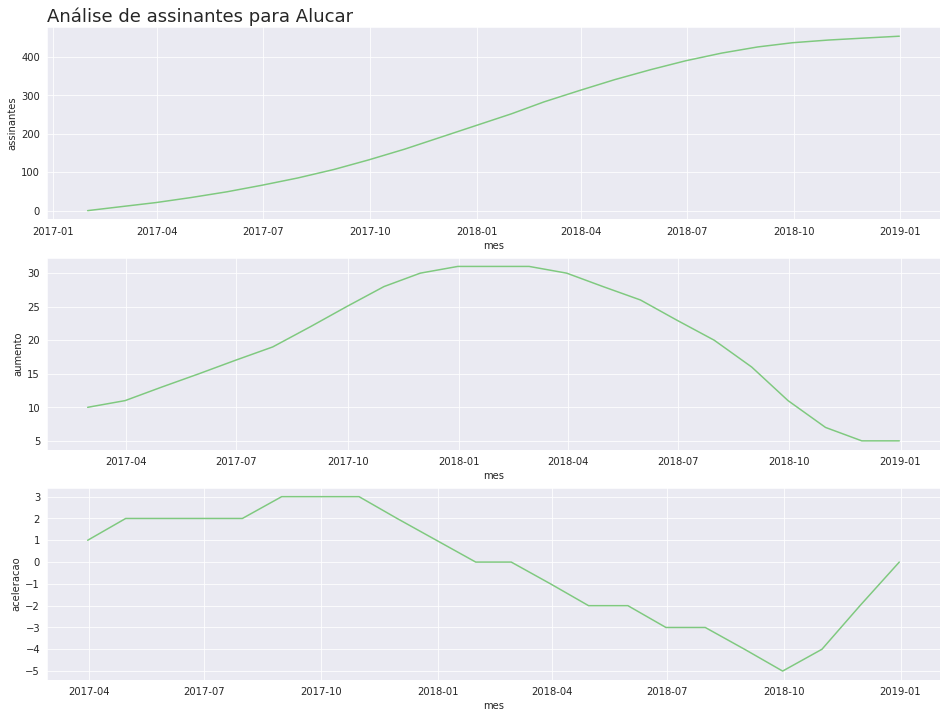

In [38]:
plot_comparacao(x='mes',y1='assinantes',y2='aumento',y3='aceleracao',dataset=assinantes,titulo='Análise de assinantes para Alucar')

### Sazonalidade e chocolate

In [39]:
#Importando os dados
chocolura = pd.read_csv('data/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [40]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [41]:
chocolura.mes = pd.to_datetime(chocolura.mes)
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [42]:
print(f'Quantidade de linhas e colunas: {chocolura.shape}')

Quantidade de linhas e colunas: (24, 2)


In [43]:
print(f'Quantidade de dados nulos: \n{chocolura.isna().sum()}')

Quantidade de dados nulos: 
mes       0
vendas    0
dtype: int64


In [44]:
print(f'Quantidade de dados nulos no dataframe: {chocolura.isna().sum().sum()}')

Quantidade de dados nulos no dataframe: 0


In [45]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura.head()

,mes,vendas,aumento
0,2017-01-01,210,NaN
1,2017-02-01,185,-25.0
2,2017-03-01,209,24.0
3,2017-04-01,280,71.0
4,2017-05-01,211,-69.0


In [46]:
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


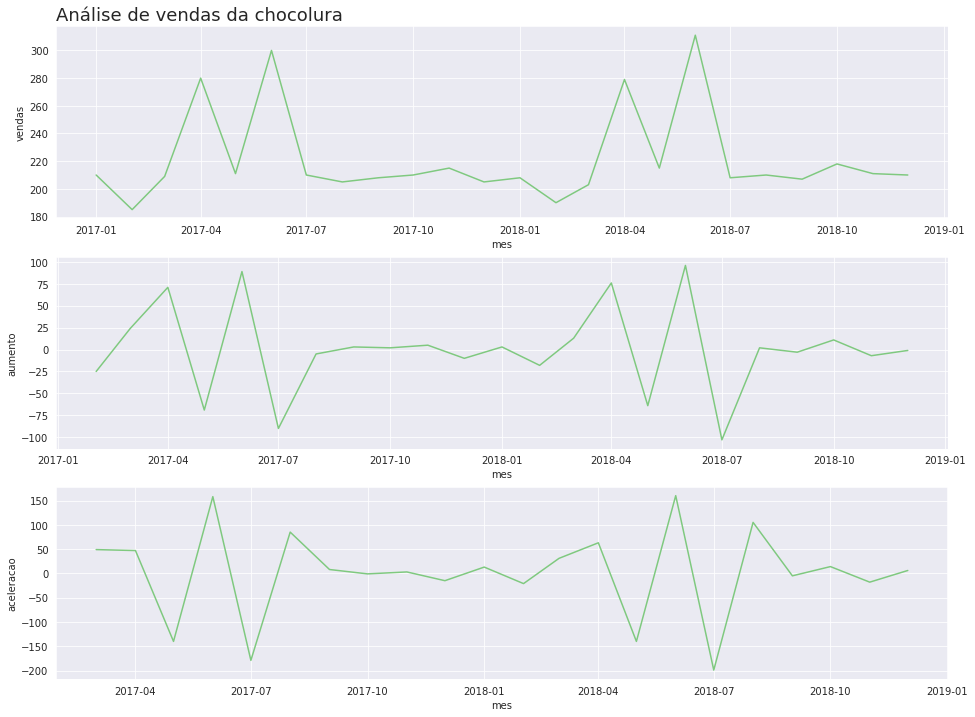

In [47]:
plot_comparacao('mes','vendas','aumento','aceleracao',chocolura,'Análise de vendas da chocolura')

### Investigando a sazonalidade

#### Chocolura - Vendas diáriss

In [48]:
# Importando os dados
vendas_por_dia = pd.read_csv('data/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [49]:
print(f'Quantidade de linhas e colunas: {vendas_por_dia.shape}')
print(f'Quantidade de dados nulos: \n{vendas_por_dia.isna().sum()}')
print(f'Quantidade de dados nulos no dataframe: {vendas_por_dia.isna().sum().sum()}')

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 
dia       0
vendas    0
dtype: int64
Quantidade de dados nulos no dataframe: 0


In [50]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [51]:
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia.dia)
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [52]:
vendas_por_dia['aumento'] = vendas_por_dia.vendas.diff()
vendas_por_dia.head()

,dia,vendas,aumento
0,2018-10-01,50,NaN
1,2018-10-02,48,-2.0
2,2018-10-03,56,8.0
3,2018-10-04,50,-6.0
4,2018-10-05,51,1.0


In [53]:
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


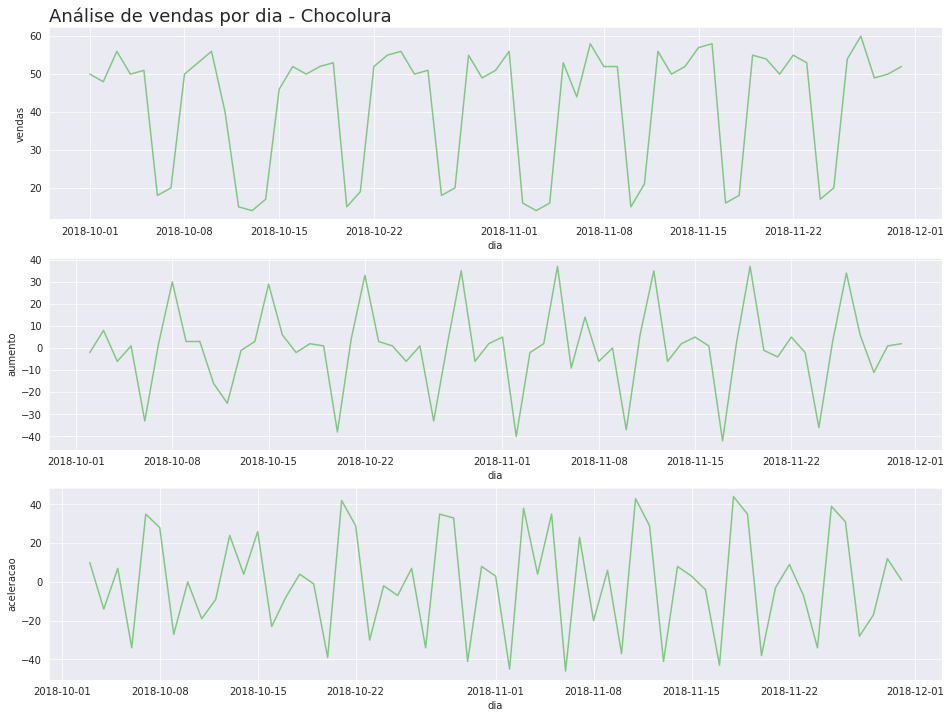

In [54]:
plot_comparacao('dia','vendas','aumento','aceleracao',vendas_por_dia,'Análise de vendas por dia - Chocolura')

#### Analisando a sazonalidade

In [55]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia.dia.dt.weekday
vendas_por_dia.head(10)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,0
1,2018-10-02,48,-2.0,NaN,1
2,2018-10-03,56,8.0,10.0,2
3,2018-10-04,50,-6.0,-14.0,3
4,2018-10-05,51,1.0,7.0,4
5,2018-10-06,18,-33.0,-34.0,5
6,2018-10-07,20,2.0,35.0,6
7,2018-10-08,50,30.0,28.0,0
8,2018-10-09,53,3.0,-27.0,1
9,2018-10-10,56,3.0,0.0,2


In [56]:
vendas_por_dia.dtypes

dia              datetime64[ns]
vendas                    int64
aumento                 float64
aceleracao              float64
dia_da_semana             int64
dtype: object

In [57]:
vendas_por_dia.dia_da_semana.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [58]:
dias_traduzidos = {
    0:'segunda',
    1:'terca',
    2:'quarta',
    3:'quinta',
    4:'sexta',
    5:'sabado',
    6:'domingo'
}

In [59]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(10)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terca
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta
5,2018-10-06,18,-33.0,-34.0,sabado
6,2018-10-07,20,2.0,35.0,domingo
7,2018-10-08,50,30.0,28.0,segunda
8,2018-10-09,53,3.0,-27.0,terca
9,2018-10-10,56,3.0,0.0,quarta


#### Agrupando os dias

In [60]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()
vendas_agrupadas

/tmp/ipykernel_1824/11833042.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()


,vendas,aumento,aceleracao
dia_da_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terca,52.0,-1.0,-34.0


### Exercício: Tendência e sazonalidade
Um grupo de pessoas estava analisando o aumento de CO2 de uma determinada cidade e para expor o resultado de sua pesquisa, foi gerado o seguinte gráfico:
<br>
Analisando o gráfico acima, é correto afirmar que:
<br>
Selecione uma alternativa

a) O gráfico possui apenas tendência. Não há sazonalidade no gráfico.
<br>
__b) O gráfico possui tendência e a sazonalidade.__
<br>
c) O gráfico não possui sazonalidade nem tendência.
<br>
d) O gráfico possui apenas sazonalidade. Não há tendência no gráfico.

### Para saber mais: Quando não aplicar análise de time series

Sabemos que time series ou series temporais são uma forma de organizar no tempo as informações quantitativas e que podemos extrair muitas informações deste tipo de dado. Porém, nem sempre podemos aplicar a análise de time series.

Abaixo temos duas recomendações de quando não aplicar analise de time series:

Não temos a variável tempo



Analisando os gráficos acima, não temos em nenhum dos eixos, a variável tempo.

A principal variável em uma time series é o tempo. Sendo assim, a ausência desta variável impossibilita análise de séries temporais.

As variáveis ou valores são constantes



Analisando o gráfico acima de uma loja que vende 5000 caixas de chocolates há 18 anos, não podemos aplicar análises de séries temporais para extrair mais informações dos dados.

## 4. Normalização e startmodels

### Autocorrelação das vendas

### Normalização

### Startmodels

In [61]:
chocolura = pd.read_csv('data/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [62]:
chocolura.mes = pd.to_datetime(chocolura.mes)
chocolura.dtypes
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


In [63]:
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

In [64]:
resultado = seasonal_decompose([chocolura['vendas']],freq=1)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [ ]:
observacao = resultado.

### Exercício: Mês de Fevereiro
Uma pessoa estava analisando as vendas de um determinado negócio particularmente não sazonal e percebeu uma queda na tendência das vendas de Fevereiro de cerca de 10% menor em comparação aos demais meses.

Sabendo disso, qual técnica ou função a pessoa poderia aplicar para descobrir o que acontece no mês de Fevereiro?

Selecione uma alternativa

a) A Função de autocorrelação apenas no valor das vendas no mês de Fevereiro
<br>
__b) A técnica de normalização pelo número de dias por mês__
<br>_Certo! Nesse caso, a técnica de normalização seria a mais indicada. Sempre que estiver acompanhando números agregados em uma time series como resultados semanais, mensais ou trimestrais, podemos utilizar a técnica de normalização._<br>
c) Aplicar a técnica de decomposição das vendas apenas no mês de Fevereiro

### Para saber mais: Encontrei dados nulos... e agora?

Se tentarmos plotar um gráfico que possui dados nulos, uma mensagem de erro será exibida informando que não temos tipos numéricos para agregar.

Pensando nisso, dentre as inúmeras possíveis soluções de contornar esse problema, <a href="https://colab.research.google.com/drive/1UZFN5Jke6gFgYLNMbsU7eBJ9Pk9TdpIm" target=blank>criei este caderno com 5 possíveis soluções para contornar a falta dos dados </a>.

Dentre as soluções listadas no notebook acima, temos:
-Preenchendo os dados nulos com o valor médio da coluna
-Preenchendo os dados nulos com um valor específico
-Deletando os dados nulos do DataFrame
-Preenchendo um dado nulo com o valor anterior ou posterior
-Interpolando dados nulos com a média<br><br>
<a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html" target=blank>Neste link, você pode acessar a documentação do pandas e encontrar outras soluções para dados nulos ou perdidos.</a>

## 5. Ruídos e média móvel

### Ruído de uma time series

In [65]:
# Importando os dados
alucel = pd.read_csv('data/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [67]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [69]:
alucel.dia = pd.to_datetime(alucel.dia)
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [70]:
print(f'Quantidade de linhas e colunas: {alucel.shape}')
print(f'Quantidade de dados nulos: \n{alucel.isna().sum()}')

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 
dia       0
vendas    0
dtype: int64


In [73]:
alucel['aumento'] = alucel.vendas.diff()
alucel['aceleracao'] = alucel.aumento.diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


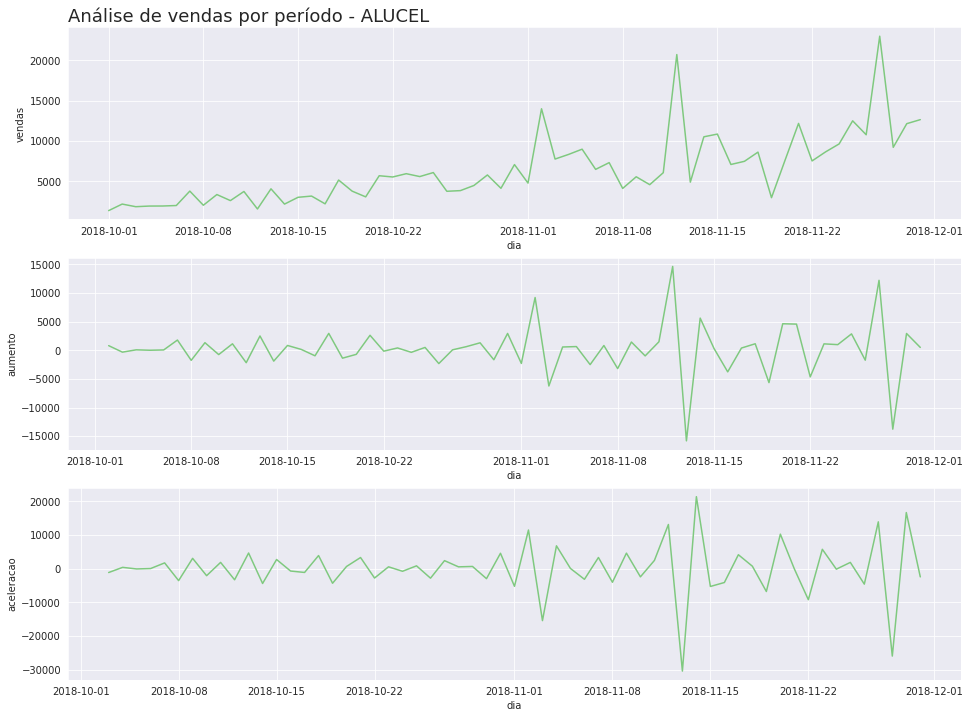

In [74]:
plot_comparacao('dia','vendas','aumento','aceleracao',alucel,'Análise de vendas por período - ALUCEL')

### Média móvel

In [77]:
alucel['media_movel'] = alucel.vendas.rolling(7).mean().round()
alucel.head(14)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2158.0
7,2018-10-08,2039.59,-1753.48,-3540.66,2253.0
8,2018-10-09,3365.58,1325.99,3079.47,2421.0
9,2018-10-10,2616.12,-749.46,-2075.45,2529.0


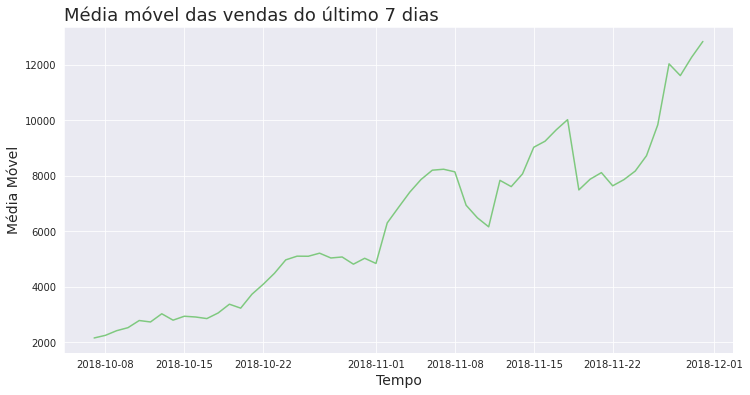

In [78]:
plotar('Média móvel das vendas do último 7 dias','Tempo','Média Móvel','dia','media_movel',alucel)

In [79]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
alucel.head()

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN


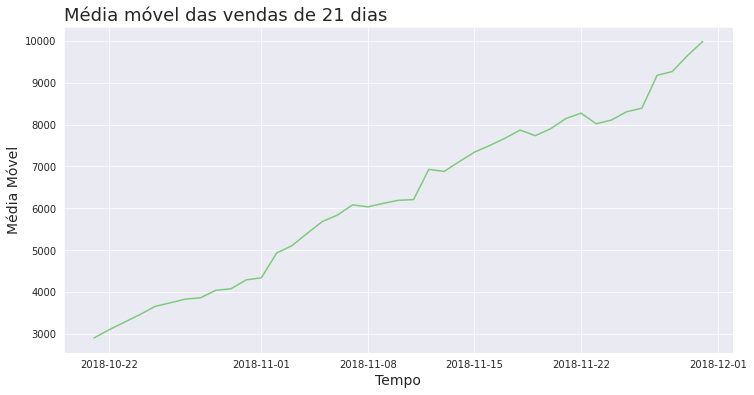

In [80]:
plotar('Média móvel das vendas de 21 dias','Tempo','Média Móvel','dia','media_movel_21',alucel)

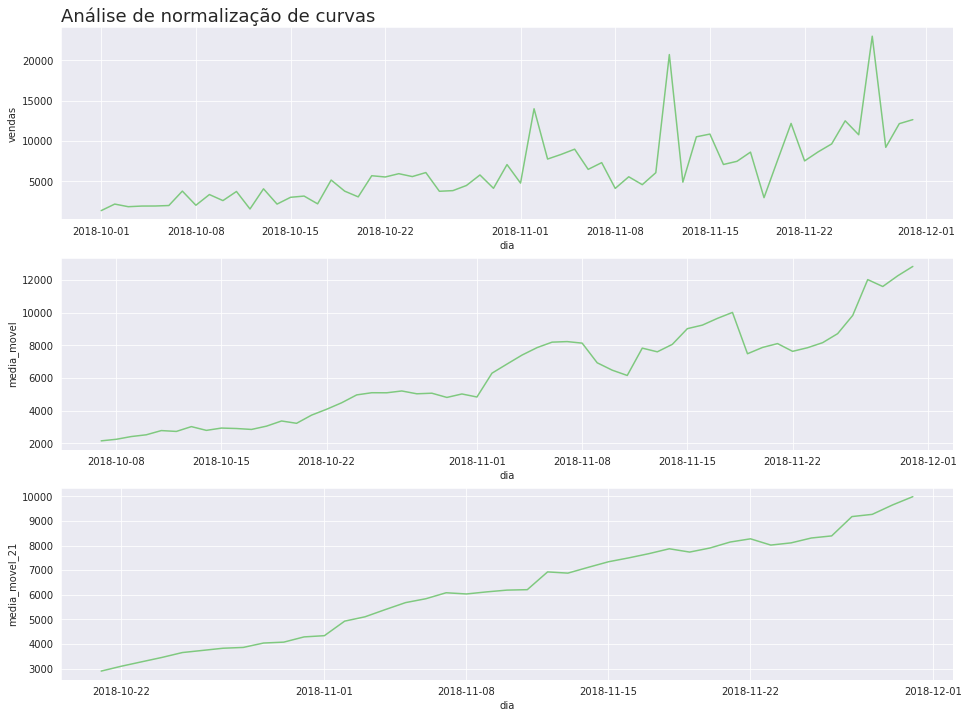

In [81]:
plot_comparacao('dia','vendas','media_movel','media_movel_21',alucel,'Análise de normalização de curvas')

### Exercício: Componentes de uma Time Series